# ANNUAL WATER USAGE IN BALTIMORE
## BY DWI SMARADAHANA INDRALOKA

## INTRODUCTIONS
The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data. The values are in the units of liters per capita per day, and there are 79 observations. The Problem is to predict annual water usage.

## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## UPLOAD DATASET

In [2]:
data = pd.read_csv('water.csv', delimiter = ";")

## RENAME THE COLUMNS NAME

In [3]:
data.columns

Index(['Year', 'Annual water use'], dtype='object')

In [4]:
rename={'Year':'year',
        'Annual water use':'annual_use'}
data.rename(columns = rename, inplace = True)

***
## MODELLING BASED ON INSTRUCTIONS
***

## 1.  Split data into two, one for model development and the other for validation

In [5]:
batas = len(data) - 20
dataset, validation = data[0:batas], data[batas:]
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

## 2. Create summary of the dataset, with python function

In [6]:
data = dataset.copy()
data.describe()

,year,annual_use
count,59.000000,59.000000
mean,1914.000000,485.288136
std,17.175564,68.033473
min,1885.000000,344.000000
25%,1899.500000,454.000000
50%,1914.000000,485.000000
75%,1928.500000,509.000000
max,1943.000000,662.000000


## 3. Create a line plot of a time series dataset, it will provide a lot of insight into the problem

Text(0.5, 1.0, 'Annual Use of Water in Baltimore')

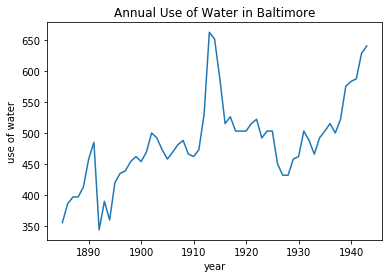

In [7]:
plt.plot(data['year'], data['annual_use'])
plt.xlabel('year')
plt.ylabel('use of water')
plt.title('Annual Use of Water in Baltimore')

* Based on the plotting above we can see that the data anual use of water in Baltimore is quite volatile, where the highest anual use occurred in around 1915 then dropped afterwards and again rose in around 1945.

## 4. Group the annual data by decade and get an idea of the spread of observations for each decade and how this may be changing

In [8]:
data['year'] = pd.to_datetime(data['year'], format = '%Y')

In [9]:
data = data.set_index(data['year'])
groups = data.loc['1885':'1935'].groupby(pd.Grouper(freq = '10AS')).mean()
groups

,annual_use
year,
1885-01-01,398.6
1895-01-01,459.8
1905-01-01,514.0
1915-01-01,516.9
1925-01-01,468.6
1935-01-01,503.0


Text(0.5, 1.0, 'Decade Use of Water in Baltimore')

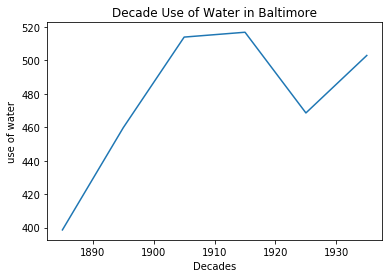

In [10]:
plt.plot(groups.index, groups['annual_use'])
plt.xlabel('Decades')
plt.ylabel('use of water')
plt.title('Decade Use of Water in Baltimore')

* Based on the plotting above the highest anual use occurred in around 1900 decade then dropped after 1910 decade and again rose in 1930 decade.

## 5. Create models using ARIMA

### 5.1 Split dataset

In [11]:
data.drop(columns = ['year'], inplace = True)

In [12]:
data = data.astype('float64')
train_size = int(len(data) * 0.8)
train = data[0:train_size]
test = data[train_size:]
print(train.shape)
print(test.shape)

(47, 1)
(12, 1)


### 5.2 Use an ARIMA (0,1,0) on the raw data may be a good starting point

In [13]:
arima_order = (0,1,0)
arima = ARIMA(train, order = arima_order)
arima_fit = arima.fit()
print(arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.annual_use   No. Observations:                   46
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -234.089
Method:                           css   S.D. of innovations             39.250
Date:                Thu, 10 Oct 2019   AIC                            472.179
Time:                        17:19:37   BIC                            475.836
Sample:                    01-01-1886   HQIC                           473.549
                         - 01-01-1931                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1957      5.787      0.552      0.584      -8.147      14.538


### 5.3 Prediction

In [14]:
y_pred = arima_fit.forecast(len(test))[0]
data_test = pd.DataFrame(y_pred, columns=['prediction'], index = test.index)
data_test['actual'] = test.values
data_test

,prediction,actual
year,,
1932-01-01,506.195652,488.0
1933-01-01,509.391304,466.0
1934-01-01,512.586957,492.0
1935-01-01,515.782609,503.0
1936-01-01,518.978261,515.0
1937-01-01,522.173913,500.0
1938-01-01,525.369565,522.0
1939-01-01,528.565217,575.0
1940-01-01,531.760870,583.0


* Based on the comparison of prediction results and actual data above, we can see that there are significant differences in values, but both data show the same trend, which continues to rise each year

## 6. Calculate RMSE

In [15]:
mse = mean_squared_error(data_test['actual'], data_test['prediction'])
rmse = np.sqrt(mse)
rmse

48.832206147970616

* Based on the ARIMA (0, 1, 0) model, the results obtained that the  Root Mean Squared Error (RMSE) value is 48.832, where the value is still large enough for the RMSE value.

***
## BASED ON OWN MODEL
***

## 1. Upload Dataset

In [16]:
data = dataset.copy()
data['year'] = pd.to_datetime(data['year'], format = '%Y')
data = data.set_index(data['year'])
data.drop(columns = ['year'], inplace = True)
data.head()

,annual_use
year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413


## 2. Line Plot of a Time Series Dataset

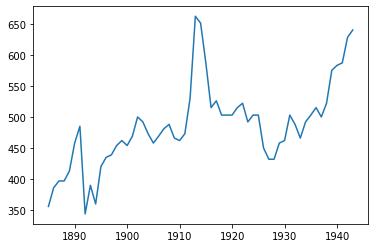

In [17]:
plt.plot(data)

* Based on the plotting above we can see that the data anual use of water in Baltimore is quite volatile, where the highest anual use occurred in around 1915 then dropped afterwards and again rose in around 1945.

## 3. Rolling Mean and Standard Deviation

In [18]:
rolmean = data.rolling(window = 4).mean()
rolstd = data.rolling(window = 4).std()

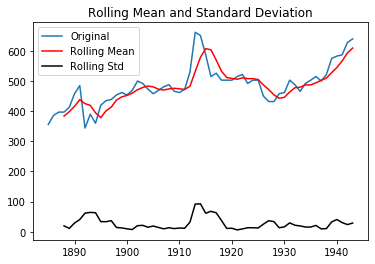

In [19]:
orig = plt.plot(data, label = "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt.plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block = False)

* Based on the plotting above we can see that the plotting of the mean and the plotting of the standard deviation is still not stationary.

In [20]:
from statsmodels.tsa.stattools import adfuller
print ("Result of Dickey-Fuller Test:")
dftest = adfuller(data["annual_use"], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                -1.833141
p-value                        0.364136
#Lags Used                     2.000000
Number of Observation Used    56.000000
Critical Value (1%)           -3.552928
Critical Value (5%)           -2.914731
Critical Value (10%)          -2.595137
dtype: float64


* Based on the result from Dickey-Fuller Test above we can see that the p-value is 36.4% where the results are well above 5% (the data can be said to be stationary when the p-value is below 5%), so we have to stationarizing the data.

## 4. Stasionarize the Data Using Differencing

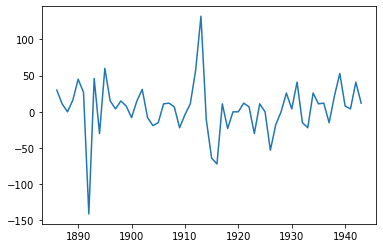

In [21]:
data_diff = data - data.shift()
plt.plot(data_diff)

In [22]:
data_diff.dropna(inplace = True)

In [23]:
print ("Result of Dickey-Fuller Test:")
dftest = adfuller(data_diff["annual_use"], autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)" %key] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                -5.615617
p-value                        0.000001
#Lags Used                     1.000000
Number of Observation Used    56.000000
Critical Value (1%)           -3.552928
Critical Value (5%)           -2.914731
Critical Value (10%)          -2.595137
dtype: float64


* Based on the result from Dickey-Fuller Test above we can see that the p-value is 0.0001% where the results are well bellow 5%, so the data can be said to be stationary.

## 5. Find Value of p and q Based on ACF and PACF Plotting

<function matplotlib.pyplot.show(*args, **kw)>

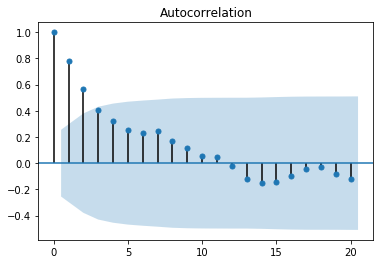

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags = 20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

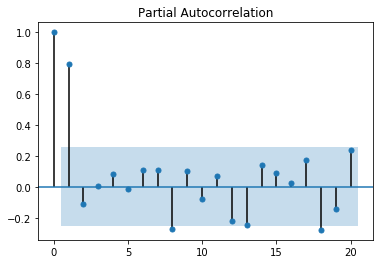

In [25]:
plot_pacf(data, lags = 20)
plt.show

* From the ACF and PACF plotting above, we get that ACF plotting has sinusoidal shape and PACF plotting has cut of after lag-1, so we use the ARIMA (1, 1, 0) for modelling.

## 6. Find Value of p and q Using Auto ARIMA

In [26]:
from pmdarima import auto_arima
stepwise_model = auto_arima(data, start_p = 0, seasonal = True,
                            trace = True, error_action = "ignore",  
                            suppress_warnings = True, 
                            stepwise = True)

Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=588.984, BIC=597.226, Fit time=0.114 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=585.696, BIC=589.817, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=587.649, BIC=593.830, Fit time=0.048 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=587.639, BIC=593.820, Fit time=0.066 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=589.612, BIC=597.854, Fit time=0.184 seconds
Total fit time: 0.429 seconds


* Based on the results using Auto ARIMA above, we get that the lowest AIC value is ARIMA (0, 1, 0) with AIC 585.69, but because we have used that model, so we use the model that has the third lowest AIC value. The model is ARIMA (1, 1, 0) with AIC 587.65.

## 7. Create Models Using ARIMA

### 7.1 Use an ARIMA (1,1,0) on the raw data may be a good starting point

In [33]:
arima_order = (1,1,0)
arima = ARIMA(train, order = arima_order)
arima_fit = arima.fit()
print(arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.annual_use   No. Observations:                   46
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -234.074
Method:                       css-mle   S.D. of innovations             39.237
Date:                Thu, 10 Oct 2019   AIC                            474.148
Time:                        18:16:37   BIC                            479.634
Sample:                    01-01-1886   HQIC                           476.203
                         - 01-01-1931                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.2329      5.940      0.544      0.589      -8.409      14.875
ar.L1.D.annual_use     0.0260      0.148      0.175      0.862      -0.264       0.316
                    

### 7.2 Prediction

In [34]:
y_pred = arima_fit.forecast(len(test))[0]
data_test = pd.DataFrame(y_pred, columns = ['prediction'], index = test.index)
data_test['actual'] = test.values
data_test

,prediction,actual
year,,
1932-01-01,507.213536,488.0
1933-01-01,510.471932,466.0
1934-01-01,513.705529,492.0
1935-01-01,516.938482,503.0
1936-01-01,520.171418,515.0
1937-01-01,523.404354,500.0
1938-01-01,526.637290,522.0
1939-01-01,529.870226,575.0
1940-01-01,533.103162,583.0


* Based on the comparison of prediction results and actual data above, we can see that there are significant differences in values, but both data show the same trend, which continues to rise each year.

## 8. Calculate RMSE

In [35]:
mse = mean_squared_error(data_test['actual'], data_test['prediction'])
rmse = np.sqrt(mse)
rmse

48.2778854844577

* Based on the ARIMA (1, 1, 0) model, the results obtained that the Root Mean Squared Error (RMSE) value is 48.278, where the value is still large enough for the RMSE value but better than ARIMA (0, 1, 0) model.

## 9. Plotting Data Prediction vs Data Actual

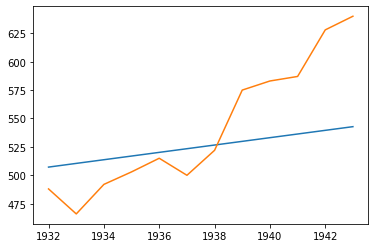

In [36]:
plt.plot(data_test['prediction'])
plt.plot(data_test['actual'])

## 10. Predict for Next Ten Period

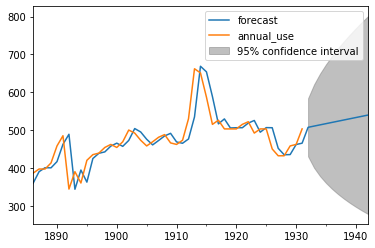

In [46]:
arima_fit.plot_predict(1, 57)
x = arima_fit.forecast(steps = 120)

In [40]:
future_forecast = stepwise_model.predict(n_periods = 10)
future_forecast = future_forecast
predict = pd.DataFrame(future_forecast, columns = ["Future Predict"])
predict

,Future Predict
0,644.896552
1,649.793103
2,654.689655
3,659.586207
4,664.482759
5,669.379310
6,674.275862
7,679.172414
8,684.068966
9,688.965517


* Based on the prediction results above, annual use of water in Baltimore continue to increase for the next 10 years. Therefore the government in Baltimore can prepare anticipations for increasing the annual use of water such as making dams to hold water reserves.

## CONCLUSION
The model that gives better results is ARIMA (1, 1, 0) with a Root Mean Squared Error (RMSE) value 48.278, RMSE is the average value of the sum of the squares of the error, it can also state the size of the error generated by a forecast model. From the results that obtained, the RMSE value is still large enough but the prediction results obtained the same trend, which continues to rise each year. By using this model, we can do predictions for future annual use of water in Baltimore, therefore the government in Baltimore can prepare anticipations for increasing the annual use of water such as making dams to hold water reserves.

***
# THANK YOU